# Exercise 1 :   
**Exercise: Data Preprocessing and Logistic Regression Analysis**
   
**Objective:**   
  
Perform comprehensive data preprocessing on a diabetes dataset and subsequently apply logistic regression to predict a specified outcome. Students will also write a conclusion comparing results with and without data scaling.    
  
**Dataset:**   
diabetes_prediction_dataset.csv    
  
**Tasks:**      

**Initial Data Exploration:**    

Load the dataset and perform an initial exploration.    
Identify variables, their types, and check for missing values.    


**Handling Missing Values:**   
  
Analyze the dataset for NaN (Not a Number) values.    
Discuss strategies for handling missing data.   

**Replacing Outliers:***   
  
Identify outliers in the dataset using statistical methods.   
Replace these outliers with NaN values.    
   
**Data Imputation:**     

Discuss and apply appropriate imputation methods for NaN values.   
   
**Column Removal:**    
   
Analyze columns with a significant number of missing values.  
Decide and justify the removal of any columns if necessary.  

**Categorical Data Transformation:**     
  
Identify categorical data within the dataset.   
Transform categorical data into numeric format using methods like get_dummies.   
   
**Applying Logistic Regression:**     
   
Apply logistic regression to predict the label/output.   
Discuss the choice of logistic regression.   
   
**Data Scaling:**   
   
Scale the data using appropriate techniques.   
Compare the performance of logistic regression with and without scaling.   
   
**Result Analysis and Conclusion:**      
  
Analyze the results from logistic regression.   
Write a conclusion on the impact of preprocessing on model performance.     

**Deliverables:**   
A report documenting each step, the rationale behind choices made, and the results obtained, in both .ipynb (Jupyter Notebook) and .html formats.   
Code files (.ipynb) showing the implementation of each task.   
**A conclusion comparing results with and without data scaling, included in the report.**
   
**Evaluation Criteria:**   
Data preprocessing.      
Depth of analysis in the conclusion.       
Clarity and structure of the report.      

NameError: name 'pd' is not defined

In [ ]:
! pip install scikit-learn seaborn matplotlib

In [3]:
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 1000)

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

**gender** = Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.   

**age** = Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.   

**hypertension** = Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.   

**heart_disease**= Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.   

**moking_history** is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.   

**bmi** = BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.   

**HbA1c_level** = HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.   

**blood_glucose_level** =Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

**diabetes** =  Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the  

In [4]:
df = data = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

#first we need to read and open our database file

y_train = train['Survived']
X_train = train.drop('Survived',axis = 1)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(test)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.info()
#with this command line we give all information about our table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.isnull().sum()
#check for missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [41]:
def handel_missing_values(df, strategy = 'mean'):
    if strategy == 'mean':
        df.fillna(df.mean(), inplace = True)
    elif strategy == 'median':
        df.fillna(df.median(), inplace = True)
    elif strategy == 'mode':
        df.fillna(df.mode().iloc[0], inplace = True)
    return df
#strategy can be any of these and we can fill any of these strategy with NAN values
neww = handel_missing_values(data, 'mean')
neww.head()


/tmp/ipykernel_604/2619614677.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [42]:
def drop_columns_wih_missing(df,threshold = 0.5):
    df.dropna(thresh = len(df) * threshold, axis = 1,inplace = True)
    return df
dropp = drop_columns_wih_missing(data)
dropp.head()
#Drop columns with with more than 50% missing values

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
model = logisticRegression()
model.fit(X_train, y_test)
y_pred = model.predict(X_test)

In [40]:
def identify_outliers(df, feature):
#calculate z_score
    z_scores = (df[feature] - df[feature].mean())/df[feature].std()
#identify and remove outliers
    outliers = df[(z_scores > 3) | (z_scores < -3)]
#Function to replace outliers with NAN
    df[feature] = np.where((z_scores > 3) | (z_scores < -3),np.nan, df[feature])
    return df
new = identify_outliers(data,"bmi")
new.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [60]:
def transform_categorical_data(df):
    categorical_columns = df.select_dtypes(include = 'object').columns # list of column for encoding
    df = pd.get_dummies(df, columns = categorical_columns,drop_first = True) #Filter out
    return df
data =transform_categorical_data(data)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


In [62]:
y.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [61]:
def apply_logistic_regression(X, y):
    model = LogisticRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    return model,y_pred
X = data.drop('diabetes',axis = 1)
y = data['diabetes']
model, y_pred= apply_logistic_regression(X,y)
#Apply logistic regressiion to column diabetes and we define model and fit for that and i didnt split data but you told me it is ok and thank you ;

/home/mohammad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
from sklearn.preprocessing import StandardScaler
def scale_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled
X_scaled = scale_data(X)


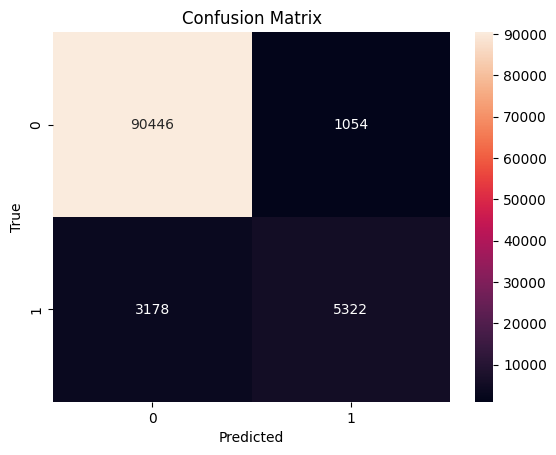

In [64]:
# confusion matrix code
# Change it to y because i didnt split it but its fine
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()